In [1]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.


exemple

In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from sklearn.metrics import mean_squared_error
from math import sqrt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
from datetime import datetime
from datetime import timedelta

ModuleNotFoundError: No module named 'matplotlib'

In [3]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.Requirement already satisfied: pyparsing>=2.2.1 in c:\users\pc\anaconda3\envs\prediction_of_tidal_coef\lib\site-packages (from matplotlib) (2.4.7)



In [4]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from sklearn.metrics import mean_squared_error
from math import sqrt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
from datetime import datetime
from datetime import timedelta

ModuleNotFoundError: No module named 'seaborn'

In [5]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [6]:
pip install statsmodels

Note: you may need to restart the kernel to use updated packages.


In [7]:
pip install sklearn

  Created wheel for sklearn: filename=sklearn-0.0-py2.py3-none-any.whl size=1309 sha256=63a3c7c958d040776e58e526b9b96075a685c0a1a056e3cb3813bc8263246ad5
  Stored in directory: c:\users\pc\appdata\local\pip\cache\wheels\22\0b\40\fd3f795caaa1fb4c6cb738bc1f56100be1e57da95849bfc897
Successfully built sklearn
Note: you may need to restart the kernel to use updated packages.


In [9]:
pip install warnings

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement warnings
ERROR: No matching distribution found for warnings


In [10]:
pip install datetime

Note: you may need to restart the kernel to use updated packages.


In [61]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from sklearn.metrics import mean_squared_error
from datetime import datetime
from datetime import timedelta
from math import sqrt

In [71]:
mare=pd.read_excel(r'dataMaree.xls')
Mare['date'] = pd.to_datetime(mare['date'])
#mare.reset_index(drop=True, inplace=True)
#mare.set_index('date', inplace=True)
#Temp.drop('Unnamed: 0',axis='columns', inplace=True)

mare

,date,coef
0,2000-01-01 12:21:00,48
1,2000-01-02 00:53:00,50
2,2000-01-02 13:19:00,53
3,2000-01-03 01:45:00,56
4,2000-01-03 14:08:00,60
...,...,...
15287,2021-08-29 20:14:00,46
15288,2021-08-30 08:36:00,40
15289,2021-08-30 21:04:00,34
15290,2021-08-31 09:40:00,30


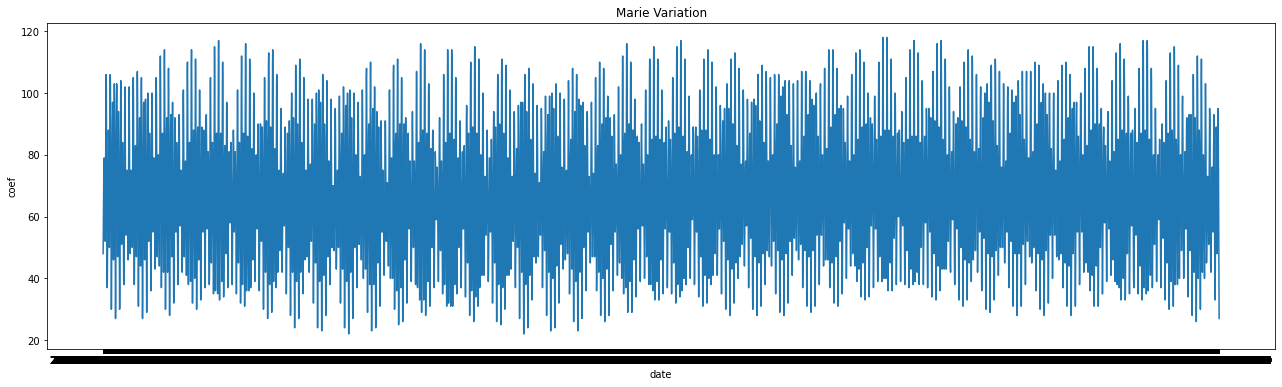

In [60]:
plt.figure(figsize=(22,6))
sns.lineplot(x=mare.index, y=mare['coef'])
plt.title('Marie Variation')
plt.show()

                      date  coef  month  year
0      2000-01-01 12:21:00    48      1  2000
1      2000-01-02 00:53:00    50      1  2000
2      2000-01-02 13:19:00    53      1  2000
3      2000-01-03 01:45:00    56      1  2000
4      2000-01-03 14:08:00    60      1  2000
...                    ...   ...    ...   ...
15287  2021-08-29 20:14:00    46      8  2021
15288  2021-08-30 08:36:00    40      8  2021
15289  2021-08-30 21:04:00    34      8  2021
15290  2021-08-31 09:40:00    30      8  2021
15291  2021-08-31 22:24:00    27      8  2021

[15292 rows x 4 columns]


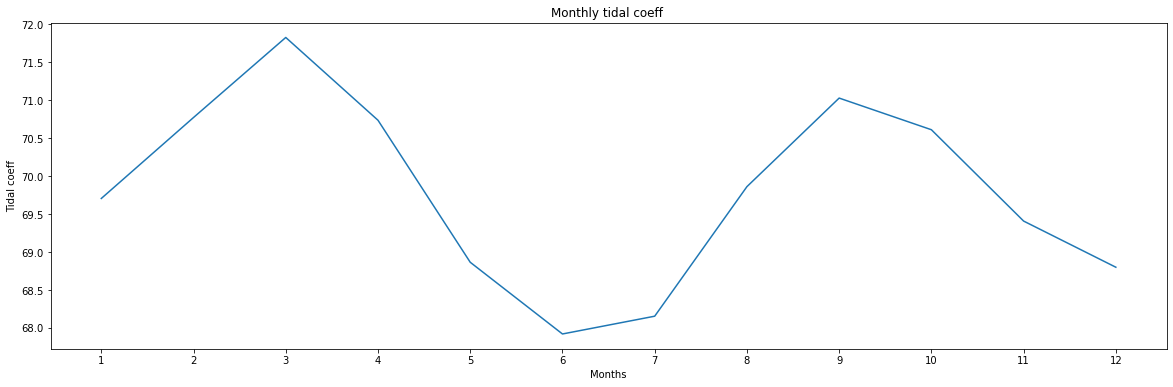

In [75]:
# i'm going to create a pivot table to plot the monthly tidal coefficients through the years
mare['month'] = pd.DatetimeIndex(mare['date']).month
mare['year'] = pd.DatetimeIndex(mare['date']).year
print(mare)
mare2=pd.DataFrame(mare)
te=mare['coef']
pivot = pd.pivot_table(mare2, values='coef', index='month', columns='year', aggfunc='mean')
#print(pivot)
#pivot.plot(figsize=(20,6))
monthly_seasonality = pivot.mean(axis=1)
monthly_seasonality.plot(figsize=(20,6))
plt.title('Monthly tidal coeff ')
plt.xlabel('Months')
plt.ylabel('Tidal coeff')
plt.xticks([x for x in range(1,13)])
plt.show()

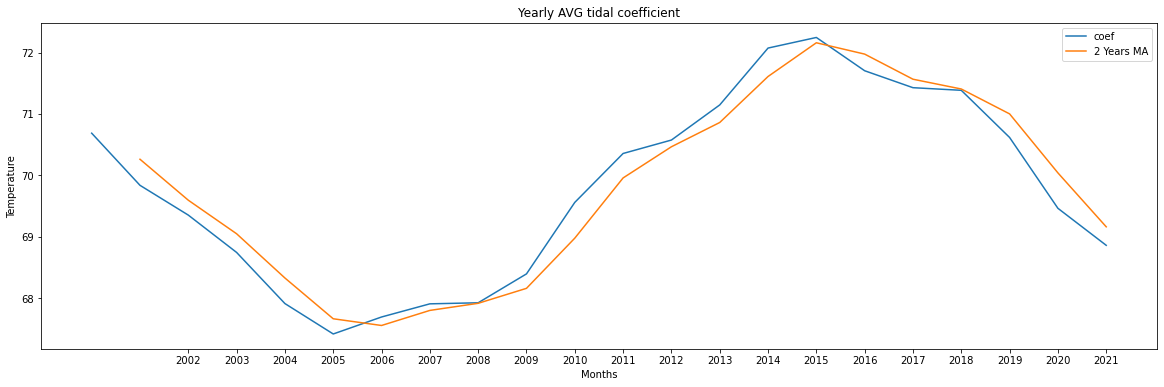

In [76]:
year_avg = pd.pivot_table(mare2, values='coef', index='year', aggfunc='mean')
year_avg['2 Years MA'] = year_avg['coef'].rolling(2).mean()
year_avg[['coef','2 Years MA']].plot(figsize=(20,6))
plt.title('Yearly AVG tidal coefficient')
plt.xlabel('Months')
plt.ylabel('Temperature')
plt.xticks([x for x in range(2002,2022,1)])
plt.show()

In [77]:
train = mare[:-60].copy()
train

,date,coef,month,year
0,2000-01-01 12:21:00,48,1,2000
1,2000-01-02 00:53:00,50,1,2000
2,2000-01-02 13:19:00,53,1,2000
3,2000-01-03 01:45:00,56,1,2000
4,2000-01-03 14:08:00,60,1,2000
...,...,...,...,...
15227,2021-07-29 19:47:00,66,7,2021
15228,2021-07-30 08:06:00,61,7,2021
15229,2021-07-30 20:26:00,55,7,2021
15230,2021-07-31 08:48:00,50,7,2021


In [78]:
val = mare[-60:-12].copy()
val

,date,coef,month,year
15232,2021-08-01 09:40:00,40,8,2021
15233,2021-08-01 22:12:00,37,8,2021
15234,2021-08-02 10:48:00,34,8,2021
15235,2021-08-02 23:27:00,33,8,2021
15236,2021-08-03 12:06:00,35,8,2021
15237,2021-08-04 00:41:00,37,8,2021
15238,2021-08-04 13:14:00,41,8,2021
15239,2021-08-05 01:42:00,45,8,2021
15240,2021-08-05 14:07:00,50,8,2021
15241,2021-08-06 02:30:00,55,8,2021


In [79]:
test = mare[-12:].copy()
test

,date,coef,month,year
15280,2021-08-26 06:17:00,85,8,2021
15281,2021-08-26 18:33:00,81,8,2021
15282,2021-08-27 06:49:00,76,8,2021
15283,2021-08-27 19:04:00,71,8,2021
15284,2021-08-28 07:20:00,65,8,2021
15285,2021-08-28 19:37:00,59,8,2021
15286,2021-08-29 07:54:00,52,8,2021
15287,2021-08-29 20:14:00,46,8,2021
15288,2021-08-30 08:36:00,40,8,2021
15289,2021-08-30 21:04:00,34,8,2021


In [80]:
# Excluding the first line, as it has NaN values
baseline = val['coef'].shift()
baseline.dropna(inplace=True)
baseline.head()

15233    40.0
15234    37.0
15235    34.0
15236    33.0
15237    35.0
Name: coef, dtype: float64

In [81]:
baseline.dropna(inplace=True)
baseline.head()


15233    40.0
15234    37.0
15235    34.0
15236    33.0
15237    35.0
Name: coef, dtype: float64

In [85]:
mare2.reset_index(drop=True, inplace=True)
mare2.set_index('date', inplace=True)
#mare.drop('Unnamed: 0',axis='columns', inplace=True)

KeyError: "None of ['date'] are in the columns"

In [82]:
def measure_rmse(y_true, y_pred):
    return sqrt(mean_squared_error(y_true,y_pred))

# Using the function with the baseline values
rmse_base = measure_rmse(val.iloc[1:,0],baseline)
print(f'The RMSE of the baseline that we will try to diminish is {round(rmse_base,4)}')

ValueError: could not convert string to float: '2021-08-01 22:12:00'

In [38]:
def check_stationarity(y, lags_plots=48, figsize=(22,8)):
    "Use Series as parameter"
    
    # Creating plots of the DF
    y = pd.Series(y)
    fig = plt.figure()

    ax1 = plt.subplot2grid((3, 3), (0, 0), colspan=2)
    ax2 = plt.subplot2grid((3, 3), (1, 0))
    ax3 = plt.subplot2grid((3, 3), (1, 1))
    ax4 = plt.subplot2grid((3, 3), (2, 0), colspan=2)

    y.plot(ax=ax1, figsize=figsize)
    ax1.set_title('Temperature Variation')
    plot_acf(y, lags=lags_plots, zero=False, ax=ax2);
    plot_pacf(y, lags=lags_plots, zero=False, ax=ax3);
    sns.distplot(y, bins=int(sqrt(len(y))), ax=ax4)
    ax4.set_title('Distribution Chart')

    plt.tight_layout()
    
    print('Results of Dickey-Fuller Test:')
    adfinput = adfuller(y)
    adftest = pd.Series(adfinput[0:4], index=['Test Statistic','p-value','Lags Used','Number of Observations Used'])
    adftest = round(adftest,4)
    
    for key, value in adfinput[4].items():
        adftest["Critical Value (%s)"%key] = value.round(4)
        
    print(adftest)
    
    if adftest[0].round(2) < adftest[5].round(2):
        print('\nThe Test Statistics is lower than the Critical Value of 5%.\nThe serie seems to be stationary')
    else:
        print("\nThe Test Statistics is higher than the Critical Value of 5%.\nThe serie isn't stationary")

C:\Users\pc\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Results of Dickey-Fuller Test:
Test Statistic                   -16.4027
p-value                            0.0000
Lags Used                         43.0000
Number of Observations Used    15188.0000
Critical Value (1%)               -3.4308
Critical Value (5%)               -2.8617
Critical Value (10%)              -2.5669
dtype: float64

The Test Statistics is lower than the Critical Value of 5%.
The serie seems to be stationary


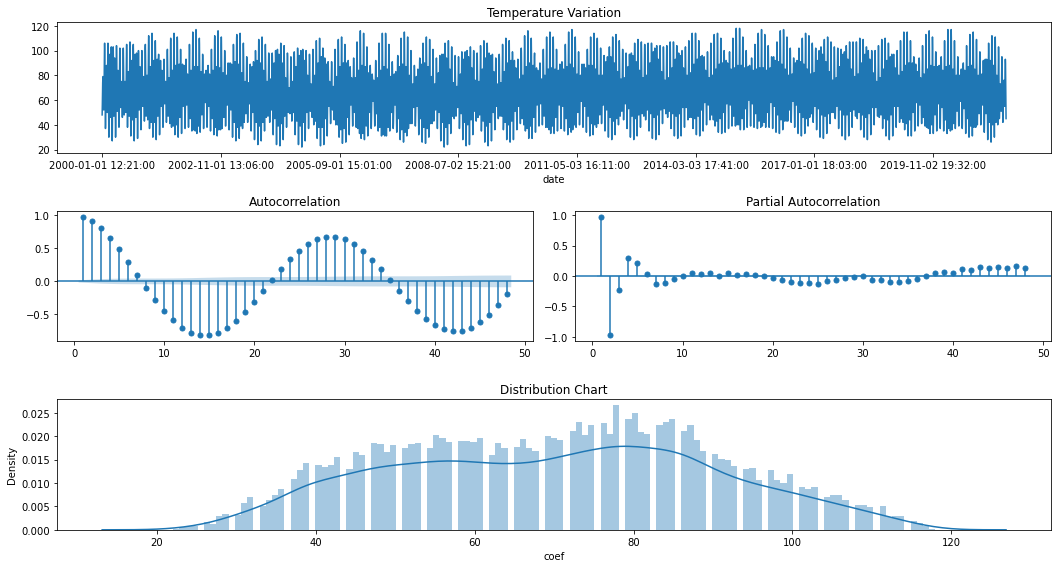

In [39]:
# The first approach is to check the series without any transformation
check_stationarity(train['coef'])

C:\Users\pc\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Results of Dickey-Fuller Test:
Test Statistic                   -52.5041
p-value                            0.0000
Lags Used                         43.0000
Number of Observations Used    15173.0000
Critical Value (1%)               -3.4308
Critical Value (5%)               -2.8617
Critical Value (10%)              -2.5669
dtype: float64

The Test Statistics is lower than the Critical Value of 5%.
The serie seems to be stationary


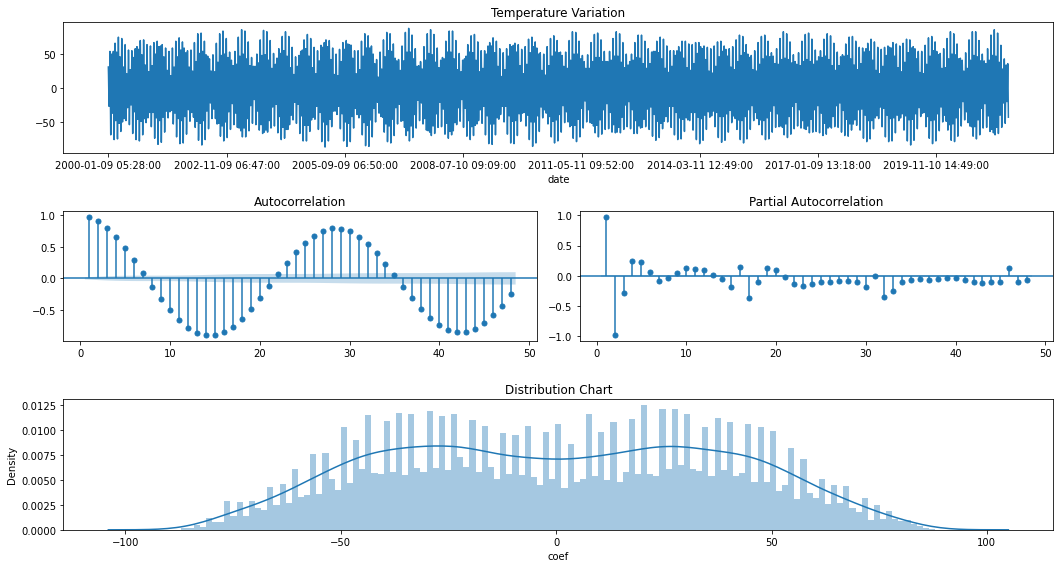

In [41]:
check_stationarity(train['coef'].diff(15).dropna())

In [42]:
def walk_forward(training_set, validation_set, params):
    '''
    Params: it's a tuple where you put together the following SARIMA parameters: ((pdq), (PDQS), trend)
    '''
    history = [x for x in training_set.values]
    prediction = list()
    
    # Using the SARIMA parameters and fitting the data
    pdq, PDQS, trend = params

    #Forecasting one period ahead in the validation set
    for week in range(len(validation_set)):
        model = sm.tsa.statespace.SARIMAX(history, order=pdq, seasonal_order=PDQS, trend=trend)
        result = model.fit(disp=False)
        yhat = result.predict(start=len(history), end=len(history))
        prediction.append(yhat[0])
        history.append(validation_set[week])         
    return prediction

In [43]:
# Let's test it in the validation set
val['Pred'] = walk_forward(train['coef'], val['coef'], ((3,0,0),(0,1,1,16),'c'))

C:\Users\pc\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'
C:\Users\pc\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\pc\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\pc\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\pc\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maxim

In [44]:
# Measuring the error of the prediction
rmse_pred = measure_rmse(val['coef'], val['Pred'])

print(f"The RMSE of the SARIMA(3,0,0),(0,1,1,12),'c' model was {round(rmse_pred,4)}")
print(f"It's a decrease of {round((rmse_pred/rmse_base-1)*100,2)}% in the RMSE")

The RMSE of the SARIMA(3,0,0),(0,1,1,12),'c' model was 0.832
It's a decrease of -77.71% in the RMSE


In [45]:
# Creating the error column
val['Error'] = val['coef'] - val['Pred']

In [46]:
def plot_error(data, figsize=(20,8)):
    '''
    There must have 3 columns following this order: Temperature, Prediction, Error
    '''
    plt.figure(figsize=figsize)
    ax1 = plt.subplot2grid((2,2), (0,0))
    ax2 = plt.subplot2grid((2,2), (0,1))
    ax3 = plt.subplot2grid((2,2), (1,0))
    ax4 = plt.subplot2grid((2,2), (1,1))
    
    #Plotting the Current and Predicted values
    ax1.plot(data.iloc[:,0:2])
    ax1.legend(['Real','Pred'])
    ax1.set_title('Current and Predicted Values')
    
    # Residual vs Predicted values
    ax2.scatter(data.iloc[:,1], data.iloc[:,2])
    ax2.set_xlabel('Predicted Values')
    ax2.set_ylabel('Errors')
    ax2.set_title('Errors versus Predicted Values')
    
    ## QQ Plot
     ## QQ Plot of the residual
    sm.graphics.qqplot(data.iloc[:,2], line='r', ax=ax3)
    
    # Autocorrelation plot of the residual
    plot_acf(data.iloc[:,2], lags=(len(data.iloc[:,2])-1),zero=False, ax=ax4)
    plt.tight_layout()
    plt.show()

In [48]:

val.head()

,coef,Pred,Error
date,,,
2021-08-01 09:40:00,40,41.379742,-1.379742
2021-08-01 22:12:00,37,36.803660,0.196340
2021-08-02 10:48:00,34,35.378646,-1.378646
2021-08-02 23:27:00,33,33.149905,-0.149905
2021-08-03 12:06:00,35,33.620647,1.379353


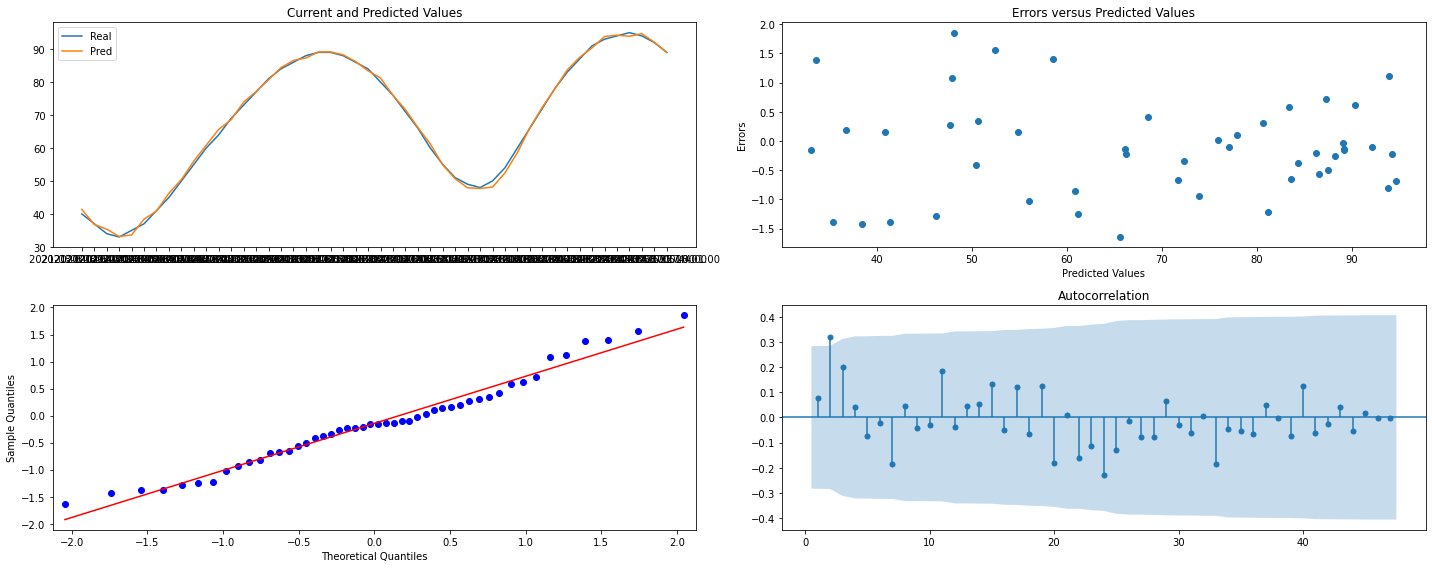

In [49]:
plot_error(val)

In [50]:
future = pd.concat([train['coef'], val['coef']])
future.head()

date
2000-01-01 12:21:00    48
2000-01-02 00:53:00    50
2000-01-02 13:19:00    53
2000-01-03 01:45:00    56
2000-01-03 14:08:00    60
Name: coef, dtype: int64

In [51]:
model = sm.tsa.statespace.SARIMAX(future, order=(3,0,0), seasonal_order=(0,1,1,12), trend='c')
result = model.fit(disp=False)

C:\Users\pc\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\pc\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\pc\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'
C:\Users\pc\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood o

In [52]:
test['Pred'] = result.predict(start=(len(future)), end=(len(future)+1))

C:\Users\pc\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:376: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'


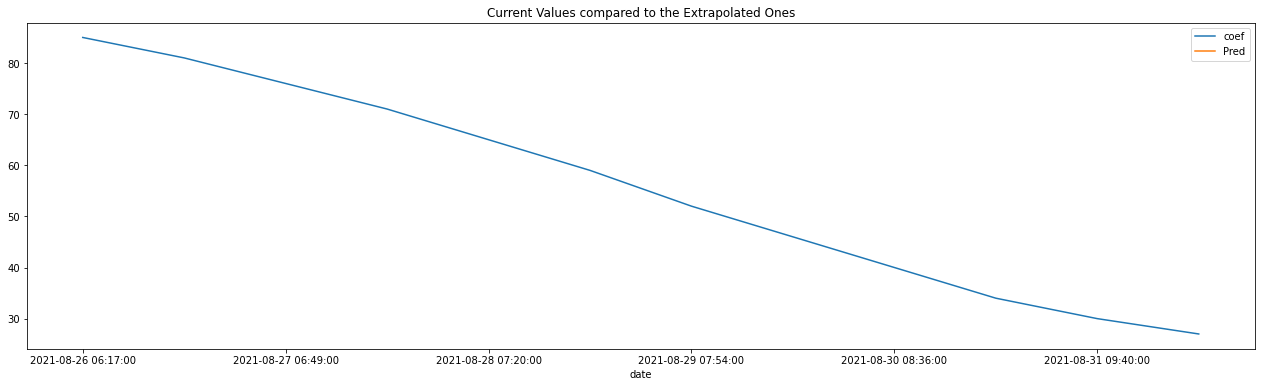

In [53]:
test[['coef', 'Pred']].plot(figsize=(22,6))
plt.title('Current Values compared to the Extrapolated Ones')
plt.show()

In [57]:
test_baseline = test['coef'].shift()

test_baseline[0] = test['coef'][0]

rmse_test_base = measure_rmse(test['coef'],test_baseline)
rmse_test_extrap = measure_rmse(test['coef'], test['Pred'])

print(f'The baseline RMSE for the test baseline was {round(rmse_test_base,2)} celsius degrees')
print(f'The baseline RMSE for the test extrapolation was {round(rmse_test_extrap,2)} celsius degrees')
print(f'That is an improvement of {-round((rmse_test_extrap/rmse_test_base-1)*100,2)}%')

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').